## Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, 
при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [17]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Чтобы не вылазили лишние предупреждающие сообщения на целый экран
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Загрузка датасета
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [13]:
# Разбиение на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Стандартизация данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Алгоритм t-SNE позволяет понижать размерность данных до двух или трёх измерений, что позволяет визуализировать данные на двумерных и трёхмерных графиках.

In [30]:
# Построение модели TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Размерность уменьшилась с 13 до 2, можно визуализировать данные.

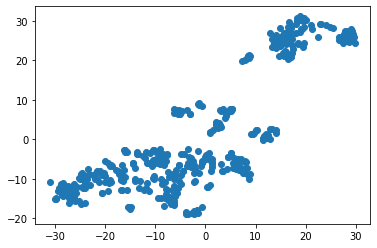

In [26]:
# Диаграмма рассеяния для тренировочных данных
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

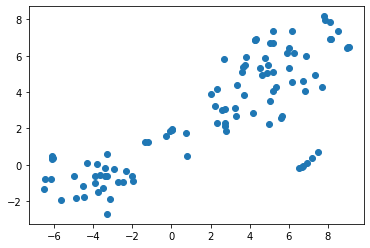

In [27]:
# Диаграмма рассеяния для тестовых данных
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

plt.show()

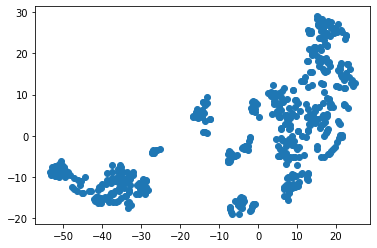

In [31]:
# Диаграмма рассеяния для всех данных
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [24]:
# Построение модели KMeans
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [34]:
# Предсказываем метки классов для тренировочных данных - будет 3 метки, соответственно значения 0,1,2.
X_train_labels = model.fit_predict(X_train_scaled)

print(X_train_labels)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


In [48]:
#plt.scatter?

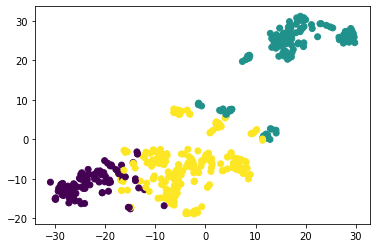

In [35]:
# Диаграмма рассеяния для тренировочных данных
# В качестве цветов можно использовать метки кластеров 
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels)

plt.show()

In [58]:
# Средние значения цены по кластерам
print('Кластер 0 - Price: {}'.format(y_train[X_train_labels == 0].mean()))
print('Кластер 1 - Price: {}'.format(y_train[X_train_labels == 1].mean()))
print('Кластер 2 - Price: {}'.format(y_train[X_train_labels == 2].mean()))

Кластер 0 - Price: 27.78837209302326
Кластер 1 - Price: 16.165354330708663
Кластер 2 - Price: 24.958115183246072


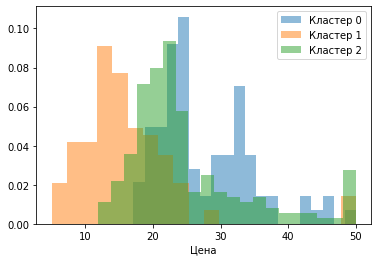

In [61]:
# Гистограммы распределения цены недвижимости по кластерам
plt.hist(y_train[X_train_labels == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[X_train_labels == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[X_train_labels == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

Кластер 0 - самая _дорогая_ недвижимость - голубой график справа.

Кластер 2 - _средняя_ по цене недвижимость - зеленый график посредине.

Кластер 1 - самая _дешевая_ недвижимость - оранжевый график - слева.

In [52]:
# Средние значения криминала по кластерам
print('Кластер 0 - CRIM: {}'.format(X_train.loc[X_train_labels == 0, 'CRIM'].mean()))
print('Кластер 1 - CRIM: {}'.format(X_train.loc[X_train_labels == 1, 'CRIM'].mean()))
print('Кластер 2 - CRIM: {}'.format(X_train.loc[X_train_labels == 2, 'CRIM'].mean()))

Кластер 0 - CRIM: 0.07356558139534884
Кластер 1 - CRIM: 10.797028425196851
Кластер 2 - CRIM: 0.4216602094240837


В кластере 1 - самый высокий уровень криминала, значительно превышающий показатели в кластерах 0 и 2.

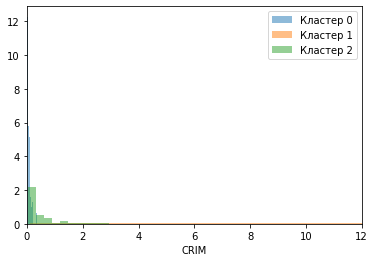

In [62]:
# Отобразим на гистограмме для наглядности
plt.hist(X_train.loc[X_train_labels == 0, 'CRIM'], bins=10, density=True, alpha=0.5)
plt.hist(X_train.loc[X_train_labels == 1, 'CRIM'], bins=10, density=True, alpha=0.5)
plt.hist(X_train.loc[X_train_labels == 2, 'CRIM'], bins=10, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

Гистограммы также показывают, что уровень криминала в самом дешевом кластере (Кластер 1) значительно выше, чем в более дорогих кластерах 0 и 2.

### * Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [63]:
# Предсказываем метки классов для тестовых данных - будет 3 метки, соответственно значения 0,1,2.
X_test_labels = model.fit_predict(X_test_scaled)

print(X_test_labels)

[1 0 2 1 2 1 1 2 2 1 1 1 2 1 1 2 1 2 0 2 1 0 1 1 2 2 1 2 1 1 1 1 2 2 2 2 1
 1 1 1 1 1 0 1 1 2 1 1 2 1 1 0 1 1 0 2 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 2 2 0
 1 2 1 0 2 2 1 2 0 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 2 2 1 1]


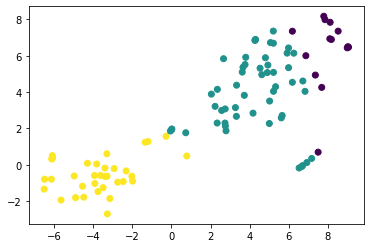

In [64]:
# Диаграмма рассеяния для тестовых данных
# В качестве цветов можно использовать метки кластеров 
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=X_test_labels)

plt.show()

In [69]:
# Средние значения криминала по кластерам
print('Кластер 0 - Pirce: {}'.format(y_test[X_test_labels == 0].mean()))
print('Кластер 1 - Price: {}'.format(y_test[X_test_labels == 1].mean()))
print('Кластер 2 - Price: {}'.format(y_test[X_test_labels == 2].mean()))

Кластер 0 - Pirce: 33.871428571428574
Кластер 1 - Price: 21.552830188679245
Кластер 2 - Price: 16.43714285714286


In [67]:
# Средние значения криминала по кластерам
print('Кластер 0 - CRIM: {}'.format(X_test.loc[X_test_labels == 0, 'CRIM'].mean()))
print('Кластер 1 - CRIM: {}'.format(X_test.loc[X_test_labels == 1, 'CRIM'].mean()))
print('Кластер 2 - CRIM: {}'.format(X_test.loc[X_test_labels == 2, 'CRIM'].mean()))

Кластер 0 - CRIM: 0.08618571428571427
Кластер 1 - CRIM: 0.25200716981132076
Кластер 2 - CRIM: 10.165531142857143


По тестовому датасету также получилось, что в самом дешевом кластере самый высокий уровен криминала. Чем дороже кластер, тем ниже уровень криминала.